In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikafatnawati","key":"f068c038f16502f6e6d348b1b7681137"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d harishkumardatalab/housing-price-prediction

  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 10.0MB/s]


In [4]:
!mkdir housing-price-prediction
!unzip housing-price-prediction.zip -d housing-price-prediction
!ls housing-price-prediction

Archive:  housing-price-prediction.zip
  inflating: housing-price-prediction/Housing.csv  
Housing.csv


# deskripsi library yang digunakan

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Memanggil Dataset

In [38]:
df = pd.read_csv('/content/housing-price-prediction/Housing.csv')

# Deskripsi Dataset

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<Axes: >

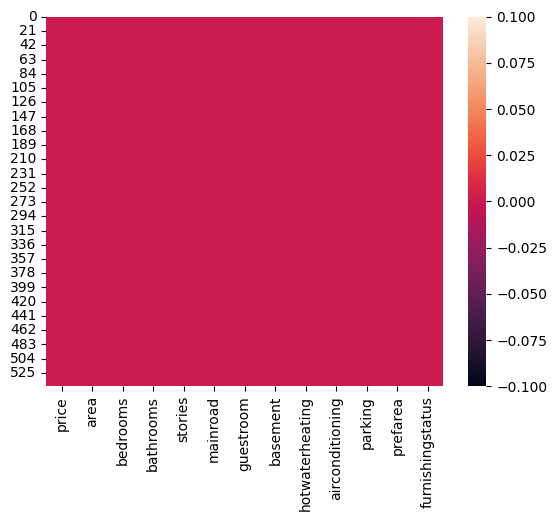

In [41]:
sns.heatmap(df.isnull())

In [42]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Visualisasi Data

<ipython-input-43-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

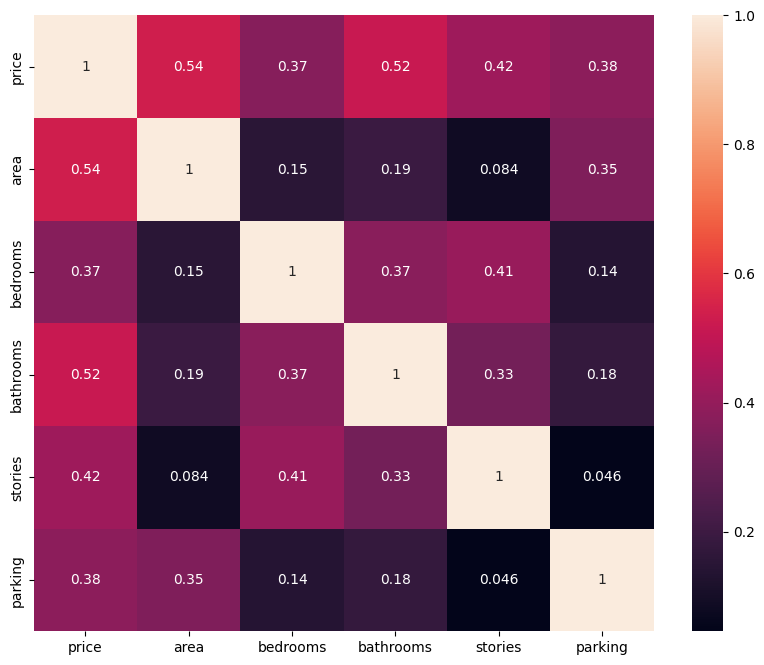

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<ipython-input-44-97491a132df1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=50)


<Axes: xlabel='price', ylabel='Density'>

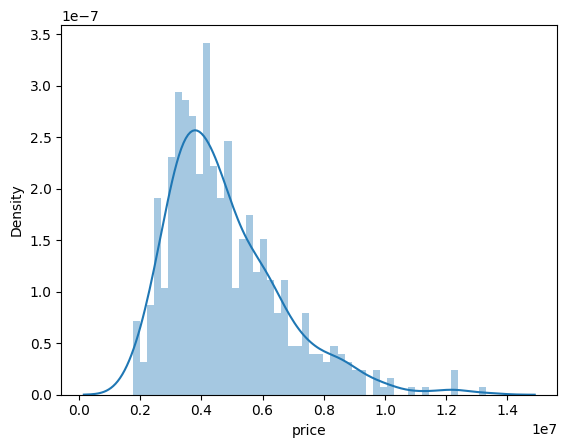

In [44]:
sns.distplot(df['price'], bins=50)

In [45]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [46]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [47]:
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [48]:
df['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [49]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [50]:
enc = LabelEncoder()
df['mainroad'] = enc.fit_transform(df[['mainroad']])
df['guestroom'] = enc.fit_transform(df[['guestroom']])
df['basement'] = enc.fit_transform(df[['basement']])
df['hotwaterheating'] = enc.fit_transform(df[['hotwaterheating']])
df['airconditioning'] = enc.fit_transform(df[['airconditioning']])
df['prefarea'] = enc.fit_transform(df[['prefarea']])
df['furnishingstatus'] = enc.fit_transform(df[['furnishingstatus']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [59]:
df['mainroad'].value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


# seleksi fitur

In [60]:
x = df.drop(['price'],axis=1)
y = df['price']
x.shape, y.shape

((545, 12), (545,))

# split data training dan data testing

In [61]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(137,)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
X_test=scalar.fit_transform(X_test)

# membuat model regresi linier

In [63]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [65]:
reg.fit(x_train,y_train)

LinearRegression()

In [66]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100)

akurasi model regresi linier =  70.4598411675003


# membuat inputan model regresi linier

In [67]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [68]:

input_data = np.array([[7420,4,2,3,1,0,0,0,1,2,1,0]])

prediction = lr.predict(input_data)
print('Estimasi harga rumah :', prediction)

Estimasi harga rumah : [2.5362611e+10]


# save model

In [69]:
import pickle

filename = 'estimasi_harga_rumah.sav'
pickle.dump(lr,open(filename,'wb'))